In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("twitter.csv")
data.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   count                     24783 non-null  int64 
 1   hate_speech_count         24783 non-null  int64 
 2   offensive_language_count  24783 non-null  int64 
 3   neither_count             24783 non-null  int64 
 4   class                     24783 non-null  int64 
 5   tweet                     24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


In [4]:
data.describe()

,count,hate_speech_count,offensive_language_count,neither_count,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.883060,0.631851,1.399459,1.113299,0.462089
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,9.000000,2.000000


In [5]:
data.shape

(24783, 6)

In [6]:
data=data[['tweet','class']]
data.head()

,tweet,class
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


In [7]:
data['class'].value_counts()
data['labels']=data['class'].map({
    0:"hate speech",
    1:"offensive language",
    2:"no hate or offensive language"
})

In [8]:
data.head()

,tweet,class,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,2,no hate or offensive language
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1,offensive language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1,offensive language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1,offensive language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1,offensive language


In [9]:
data.drop(['class'],inplace=True,axis=1)

In [10]:
data.head()

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,no hate or offensive language
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive language


# NLP

In [11]:
import re
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords=stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sabari\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [13]:
stemmer = nltk.SnowballStemmer("english") #removal  of -ing,-ed of any word

In [14]:
stopwords.append('rt')

In [15]:
#data cleaning(NLP)
def data_clean(text):
    text=str(text).lower()
    text = re.sub('https?://\S+|www\.S+','',text)  #removing 'https:,www,..'
    text = re.sub('\[.*?\]','',text)
    text = re.sub('<.*?>+','',text)
    text = re.sub('[%s]' %re.escape(string.punctuation),'',text) #removing punctuation
    text = re.sub('\n','',text)
    text = re.sub('\w*\d\w*','',text)
    #removal of stopwords
    text = [word for word in text.split(' ') if word not in stopwords]
    text = [stemmer.stem(word) for word in text]
    text = " ".join(text)
    return text

In [16]:
data["tweet"]=data["tweet"].apply(data_clean)

In [17]:
data.head()

,tweet,labels
0,mayasolov woman shouldnt complain clean hous ...,no hate or offensive language
1,boy dat coldtyga dwn bad cuffin dat hoe place,offensive language
2,urkindofbrand dawg ever fuck bitch start cri...,offensive language
3,cganderson vivabas look like tranni,offensive language
4,shenikarobert shit hear might true might fake...,offensive language


# Modeling

In [18]:
X = np.array(data['tweet'])
y = np.array(data['labels'])

In [19]:
X

array([' mayasolov woman shouldnt complain clean hous amp man alway take trash',
       '  boy dat coldtyga dwn bad cuffin dat hoe  place',
       ' urkindofbrand dawg  ever fuck bitch start cri confus shit', ...,
       'young buck wanna eat dat nigguh like aint fuckin dis',
       'youu got wild bitch tellin lie',
       'ruffl  ntac eileen dahlia  beauti color combin pink orang yellow amp white coll '],
      dtype=object)

In [20]:
y

array(['no hate or offensive language', 'offensive language',
       'offensive language', ..., 'offensive language',
       'offensive language', 'no hate or offensive language'],
      dtype=object)

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
cv = CountVectorizer()
X = cv.fit_transform(X)
X

<24783x25692 sparse matrix of type '<class 'numpy.int64'>'
	with 190738 stored elements in Compressed Sparse Row format>

In [22]:
 X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [24]:
y_pred = dt.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 171,   33,  261],
       [  32, 1132,  215],
       [ 262,  234, 5839]], dtype=int64)

<Axes: >

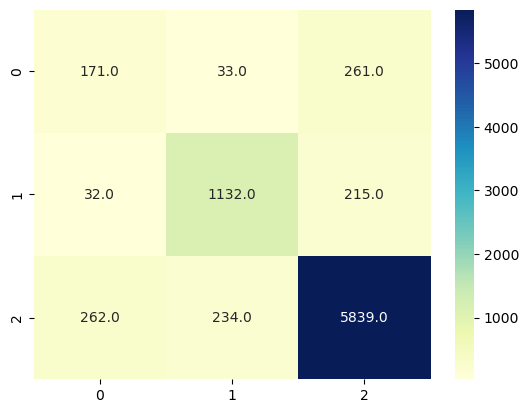

In [26]:
sns.heatmap(cm,cmap='YlGnBu',annot=True, fmt='.1f' )

In [27]:
accuracy_score(y_test,y_pred)*100

87.321188409341